In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

#Increasing the columns views limit
pd.options.display.max_columns = None
pd.options.display.max_rows = 150
pd.options.display.float_format = '{:.2f}'.format

In [190]:
df = pd.read_csv("Leads.csv")

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [192]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [193]:
# Identify the count of null columns
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [194]:
df.shape

(9240, 37)

In [195]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


* By viewing the columns in excel we can see some columns have "select" as an entry which appears to be a null entry. First we will replace select by nan.

#### FInd columns that have select as a value and then replace "Select" with null values

In [196]:
# Select all columns that have data type as object
df_sel = df.select_dtypes(include='object')

# Find out columns that have "Select" as an entry
l = df_sel.columns[df_sel.apply(lambda x: x.str.contains('Select', na=False)).any()].tolist()
print (l)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [197]:
# select the columns from above that have a "Select" entry
df_sel_cols = ['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']

# replace values
df[df_sel_cols] = df[df_sel_cols].replace('Select', np.NaN)

In [198]:
# Calculate percentage of null values for each column
(df.isnull().sum() / df.shape[0]) * 100

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
How did you hear about X Education              78.46
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

#### Inferences :
#### From the data analysis we can see that for below mentioned null values the percentage is same. Also from data we can see that lead who have not filled values in one column have left all the other 3 columns blank.
1. Asymmetrique Activity Index                     45.65
2. Asymmetrique Profile Index                      45.65
3. Asymmetrique Activity Score                     45.65
4. Asymmetrique Profile Score                      45.65

#### Since we have a lot of columns that have very large number of null values.It is better to drop these columns.  
#### Drop columns with more then 40% null values

In [199]:
df.drop(["Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity Score",
            "Asymmetrique Profile Score", "Lead Profile","Lead Quality","How did you hear about X Education"], 
        axis = 1, inplace = True)

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [200]:
df.shape

(9240, 30)

In [201]:
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

#### By looking at unique values we can see that some columns have just single value as entry. This will provide no insight in data analysis. These columns can be dropped .

In [202]:
df.drop(['Magazine', 'Receive More Updates About Our Courses' , 'Update me on Supply Chain Content',
        'Get updates on DM Content' , 'I agree to pay the amount through cheque' ],axis=1,inplace=True)
df.shape

(9240, 25)

In [203]:
# Calculate percentage of null values for each column
(df.isnull().sum() / df.shape[0]) * 100

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

Now we will analyse the data in each column where missing values is still significant and find suitable substitution for those values so that data integrity is not altered. 

In [204]:
# first in the list is Country column, lets its content percentage
df["Country"].value_counts(normalize = True, dropna = False)*100

India                  70.26
NaN                    26.63
United States           0.75
United Arab Emirates    0.57
Singapore               0.26
Saudi Arabia            0.23
United Kingdom          0.16
Australia               0.14
Qatar                   0.11
Bahrain                 0.08
Hong Kong               0.08
Oman                    0.06
France                  0.06
unknown                 0.05
Kuwait                  0.04
South Africa            0.04
Canada                  0.04
Nigeria                 0.04
Germany                 0.04
Sweden                  0.03
Philippines             0.02
Uganda                  0.02
Italy                   0.02
Bangladesh              0.02
Netherlands             0.02
Asia/Pacific Region     0.02
China                   0.02
Belgium                 0.02
Ghana                   0.02
Kenya                   0.01
Sri Lanka               0.01
Tanzania                0.01
Malaysia                0.01
Liberia                 0.01
Switzerland   

* Since India is the most common occurence among the non-missing values. This is highly skewed data and if we convert all the null values to India the data gets even more skewed as 97% of all leads come from India. So its better to drop this column

In [205]:
df.drop('Country', axis = 1, inplace = True)

In [206]:
df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

* Here maximum leads have not mentioned their Specialization. Also data gives no indication that any specific specizlization has shown greater interest. SO its better to change null values to "Not provided"

In [207]:
df['Specialization'] = df['Specialization'].replace(np.nan, "Not provided")

In [208]:
# categorize all management courses
df.loc[(df.Specialization == 'Finance Management') | (df.Specialization == 'Human Resource Management') | 
       (df.Specialization == 'Marketing Management') |  (df.Specialization == 'Operations Management') |
       (df.Specialization == 'IT Projects Management') | (df.Specialization == 'Supply Chain Management') |
       (df.Specialization == 'Healthcare Management') | (df.Specialization == 'Hospitality Management') |
       (df.Specialization == 'Retail Management') , 'Specialization'] = 'Management Specializations'

# categorize all busines courses
df.loc[(df.Specialization == 'Business Administration') | (df.Specialization == 'International Business') | 
       (df.Specialization == 'Rural and Agribusiness') | (df.Specialization == 'E-Business') 
        , 'Specialization'] = 'Business Specializations'
# categorize all industry courses
df.loc[(df.Specialization == 'Banking, Investment And Insurance') | (df.Specialization == 'Media and Advertising') |
       (df.Specialization == 'Travel and Tourism') | (df.Specialization == 'Services Excellence') |
       (df.Specialization == 'E-COMMERCE'), 'Specialization'] = 'Industry Specializations'

In [209]:
df['Specialization'] = df['Specialization'].replace(np.nan, "Not provided")
df['Specialization'].value_counts(normalize=True, dropna=False)*100

Management Specializations   46.03
Not provided                 36.58
Industry Specializations      9.70
Business Specializations      7.69
Name: Specialization, dtype: float64

In [210]:
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

* maximum leads are unemployed, which is obvious as the umemployed will have greater urge to learn new skills and upgrade to become employable, hence we can safely replace null values with unemployed. 

In [211]:
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')
df['What is your current occupation'].value_counts(normalize = True)*100

Unemployed             89.72
Working Professional    7.64
Student                 2.27
Other                   0.17
Housewife               0.11
Businessman             0.09
Name: What is your current occupation, dtype: float64

* From above we can see that 90% of the population is umemployed. So we can group this column into umemployed, Working Professional and Others for better analysis

In [212]:
df['What is your current occupation']= df['What is your current occupation'].replace(['Student','Other','Housewife'
                                                                                      ,'Businessman'],'Others')

In [213]:
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

* As previously done, we have dropped columns that had unique values, here also almost 100% of the leads fall in Better career prospects or null values,no proper inference can be derived from this. Hence we can drop this column.

In [214]:
df.drop('What matters most to you in choosing a course', axis = 1, inplace = True)

In [215]:
df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

* Again here cant replace null value with any other value. Hence we will replace it with "Not Provided"

In [216]:
df['Tags'] = df['Tags'].replace(np.nan, 'Not provided')
df['Tags'].value_counts(dropna=False)

Not provided                                         3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [217]:
#checking value counts of "City" column

df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

* Again we can see that the entire data is from one metro city - mumbai. we can safely replace missing values with mumbai as maximum leads are from mumbai

In [218]:
df['City'] = df['City'].replace(np.nan, 'Mumbai')
df['City'].value_counts(dropna=False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [219]:
# Calculate percentage of null values for each column
(df.isnull().sum() / df.shape[0]) * 100

Prospect ID                              0.00
Lead Number                              0.00
Lead Origin                              0.00
Lead Source                              0.39
Do Not Email                             0.00
Do Not Call                              0.00
Converted                                0.00
TotalVisits                              1.48
Total Time Spent on Website              0.00
Page Views Per Visit                     1.48
Last Activity                            1.11
Specialization                           0.00
What is your current occupation          0.00
Search                                   0.00
Newspaper Article                        0.00
X Education Forums                       0.00
Newspaper                                0.00
Digital Advertisement                    0.00
Through Recommendations                  0.00
Tags                                     0.00
City                                     0.00
A free copy of Mastering The Inter

In [220]:
df['Lead Source'].value_counts(dropna= False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [221]:
#replace null value and combine it with low frequency values into one group as Others
df['Lead Source'] = df['Lead Source'].replace(np.nan,'Others')
df['Lead Source'] = df['Lead Source'].replace('google','Google')
df['Lead Source'] = df['Lead Source'].replace('Facebook','Social Media')
df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release','Live Chat',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others') 

In [222]:
df['Lead Source'].value_counts(dropna= False)

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Others                57
Name: Lead Source, dtype: int64

In [223]:
df['TotalVisits'].value_counts(dropna= False)

0.00      2189
2.00      1680
3.00      1306
4.00      1120
5.00       783
6.00       466
1.00       395
7.00       309
8.00       224
9.00       164
NaN        137
10.00      114
11.00       86
13.00       48
12.00       45
14.00       36
16.00       21
15.00       18
17.00       16
18.00       15
20.00       12
19.00        9
21.00        6
23.00        6
24.00        5
25.00        5
27.00        5
22.00        3
29.00        2
28.00        2
26.00        2
141.00       1
55.00        1
30.00        1
43.00        1
74.00        1
41.00        1
54.00        1
115.00       1
251.00       1
32.00        1
42.00        1
Name: TotalVisits, dtype: int64

In [224]:
# we can group all visits above 10 as 10 and above including null values
df['TotalVisits'] = df['TotalVisits'].replace(np.nan,'10')
df['TotalVisits'] = df['TotalVisits'].replace([10.0,11.0,13.0,12.0,14.00,16.00,15.00,17.00,18.00,19.00,20.00,
                                               21.00,22.00,23.00,24.00,25.00,26.00,27.00,29.00,28.00,26.00,141.00,
                                               55.00,30.00,43.00,74.00,41.00,54.00,115.00,251.00,32.00,42.00],'10')

In [225]:
df['TotalVisits'].value_counts(normalize= True,dropna= False)*100

0.0   23.69
2.0   18.18
3.0   14.13
4.0   12.12
5.0    8.47
10     6.54
6.0    5.04
1.0    4.27
7.0    3.34
8.0    2.42
9.0    1.77
Name: TotalVisits, dtype: float64

In [226]:
df['Page Views Per Visit'].value_counts(dropna=False)                                              

0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
NaN       137
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
4.33        9
14.00       9
2.80        9
2.20        9
1.60        8
2.17        8
3.25        8
2.40        6
13.00       6
1.20        5
12.00       5
1.43        4
3.40        4
2.60        4
1.71        4
1.83        4
15.00       4
1.38        3
4.25        3
4.75        3
1.57        3
16.00       3
5.67        3
1.78        3
1.56        2
5.40        2
2.71        2
2.83        2
1.23        2
1.22        2
3.60        2
3.75        2
7.50        2
1.14        2
2.22        2
5.25        2
5.33        2
2.09        2
3.20        2
4.17        1
2.57  

In [227]:
df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

* From above 2 columns-"Last Activity","Page Views Per Visit" we can see that null values are very small and suitable replacement for these null values is not feasible. Also if we drop these null values our data will not be affected as the perceantage is very small.

In [228]:
df = df.dropna()

In [229]:
# Calculate percentage of null values for each column
(df.isnull().sum() / df.shape[0]) * 100

Prospect ID                              0.00
Lead Number                              0.00
Lead Origin                              0.00
Lead Source                              0.00
Do Not Email                             0.00
Do Not Call                              0.00
Converted                                0.00
TotalVisits                              0.00
Total Time Spent on Website              0.00
Page Views Per Visit                     0.00
Last Activity                            0.00
Specialization                           0.00
What is your current occupation          0.00
Search                                   0.00
Newspaper Article                        0.00
X Education Forums                       0.00
Newspaper                                0.00
Digital Advertisement                    0.00
Through Recommendations                  0.00
Tags                                     0.00
City                                     0.00
A free copy of Mastering The Inter

In [230]:
df.shape

(9103, 23)

Handle categorical columns with low number of missing values and low representation of categories
In this step, we will go through the rest of the categorical columns one by one and

Merge categories that have low representation
Impute the missing values

In [231]:
# determine unique values for all object datatype columns
for a, b in df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(a,b))

Prospect ID = 9103
Lead Origin = 4
Lead Source = 9
Do Not Email = 2
Do Not Call = 2
TotalVisits = 11
Last Activity = 17
Specialization = 4
What is your current occupation = 3
Search = 2
Newspaper Article = 2
X Education Forums = 2
Newspaper = 2
Digital Advertisement = 2
Through Recommendations = 2
Tags = 27
City = 6
A free copy of Mastering The Interview = 2
Last Notable Activity = 16


In [232]:
# select binary columns in a new dataframe and see what is the distribution
df_bin = df[['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 
           'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']]

# see value counts for each of the columns
for i in df_bin.columns:
    x = (df_bin[i].value_counts(normalize = True)) * 100
    print(x)
    print()

No    92.05
Yes    7.95
Name: Do Not Email, dtype: float64

No    99.98
Yes    0.02
Name: Do Not Call, dtype: float64

No    99.85
Yes    0.15
Name: Search, dtype: float64

No    99.98
Yes    0.02
Name: Newspaper Article, dtype: float64

No    99.99
Yes    0.01
Name: X Education Forums, dtype: float64

No    99.99
Yes    0.01
Name: Newspaper, dtype: float64

No    99.96
Yes    0.04
Name: Digital Advertisement, dtype: float64

No    99.92
Yes    0.08
Name: Through Recommendations, dtype: float64

No    68.27
Yes   31.73
Name: A free copy of Mastering The Interview, dtype: float64



* The data analysis proves that almost 100% of the leads select "No' as an option for - 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations'.
* From above output we can very well see that many columns have singular selection that is almost 100%. Hence we can drop that column from dataframe.

In [233]:
df.drop(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 
           'Newspaper', 'Digital Advertisement', 'Through Recommendations'],axis = 1, inplace = True)

In [234]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.00,0,0.00,Page Visited on Website,Not provided,Unemployed,Interested in other courses,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.00,674,2.50,Email Opened,Not provided,Unemployed,Ringing,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.00,1532,2.00,Email Opened,Business Specializations,Others,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.00,305,1.00,Unreachable,Industry Specializations,Unemployed,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.00,1428,1.00,Converted to Lead,Not provided,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [235]:
df.shape

(9103, 16)

In [236]:
df[['TotalVisits']] = df[['TotalVisits']].astype('float64')

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9103 non-null   object 
 1   Lead Number                             9103 non-null   int64  
 2   Lead Origin                             9103 non-null   object 
 3   Lead Source                             9103 non-null   object 
 4   Do Not Email                            9103 non-null   object 
 5   Converted                               9103 non-null   int64  
 6   TotalVisits                             9103 non-null   float64
 7   Total Time Spent on Website             9103 non-null   int64  
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9103 non-null   object 
 10  Specialization                          9103 non-null   obje

From the leads data dictionary - Prospect ID and Lead Number are the unique identity ID provided and one can be dropped to reduce dataframe size. Also total rows in dataframe=9103 and number of unique values in each one of them = 9103. SO we will drop Prospect ID

In [238]:
df.nunique()

Prospect ID                               9103
Lead Number                               9103
Lead Origin                                  4
Lead Source                                  9
Do Not Email                                 2
Converted                                    2
TotalVisits                                 11
Total Time Spent on Website               1717
Page Views Per Visit                       114
Last Activity                               17
Specialization                               4
What is your current occupation              3
Tags                                        27
City                                         6
A free copy of Mastering The Interview       2
Last Notable Activity                       16
dtype: int64

In [239]:
df.drop('Prospect ID',axis=1,inplace=True)

In [240]:
df.shape

(9103, 15)

In [241]:
df['Page Views Per Visit'].value_counts(dropna=False)

0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
2.80        9
14.00       9
4.33        9
2.20        9
2.17        8
1.60        8
3.25        8
2.40        6
13.00       6
12.00       5
1.20        5
1.83        4
3.40        4
2.60        4
1.43        4
15.00       4
1.71        4
1.78        3
4.25        3
16.00       3
4.75        3
5.67        3
1.57        3
1.38        3
3.60        2
1.23        2
1.56        2
5.40        2
2.22        2
7.50        2
1.14        2
5.25        2
2.09        2
3.20        2
3.75        2
5.33        2
2.83        2
2.71        2
1.22        2
2.13        1
1.54        1
6.67  

In [242]:
df['Total Time Spent on Website'].value_counts(dropna=False)

0       2193
60        19
127       18
75        18
74        17
        ... 
609        1
1035       1
802        1
840        1
927        1
Name: Total Time Spent on Website, Length: 1717, dtype: int64

In [243]:
df_col=df.columns.to_list()
df_col.remove('Converted')
df_col.remove('Lead Number')
df_col.remove('Total Time Spent on Website')
df_col.remove('Page Views Per Visit')
df_col

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'TotalVisits',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

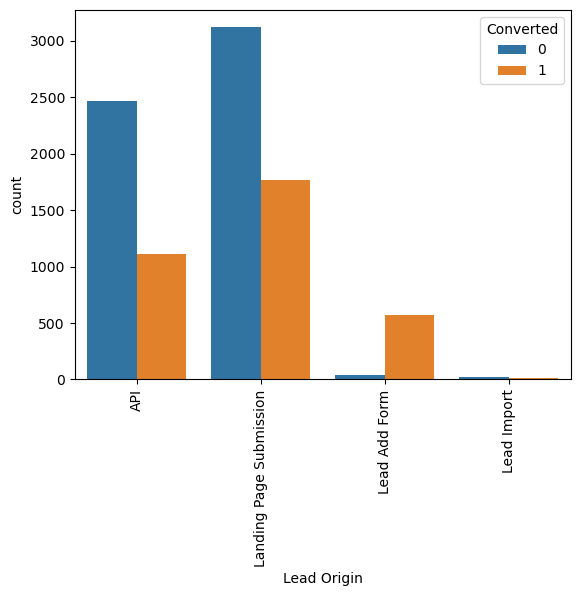

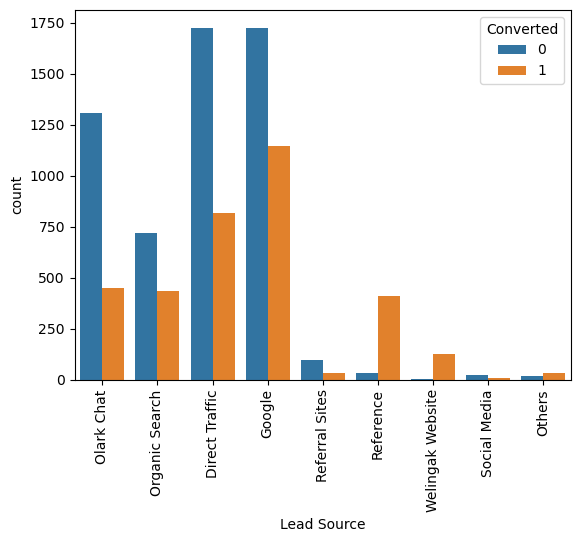

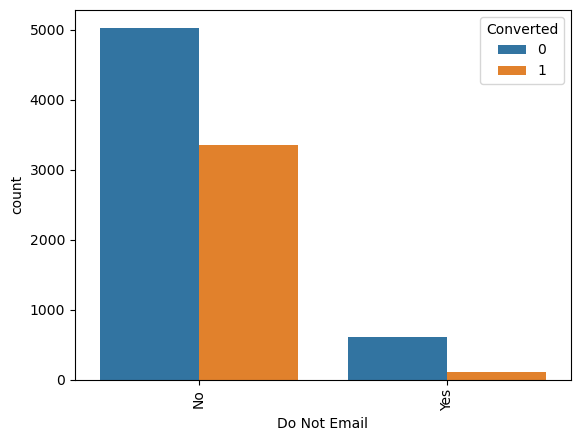

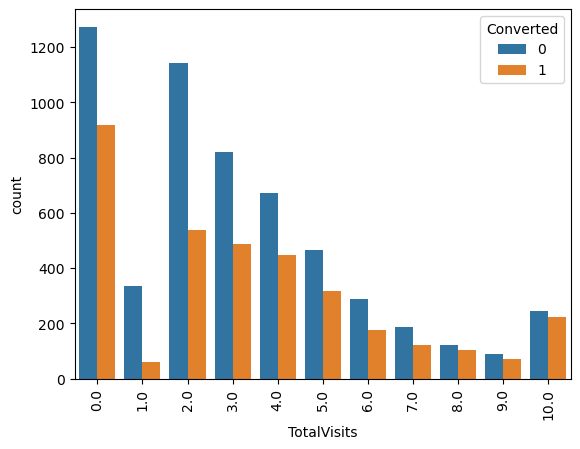

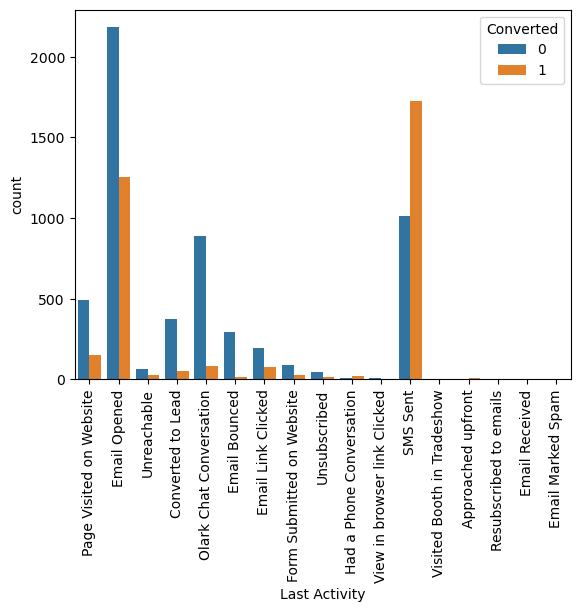

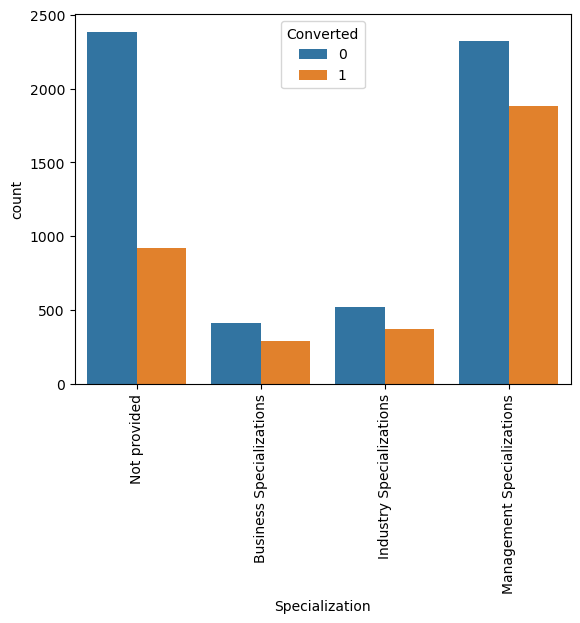

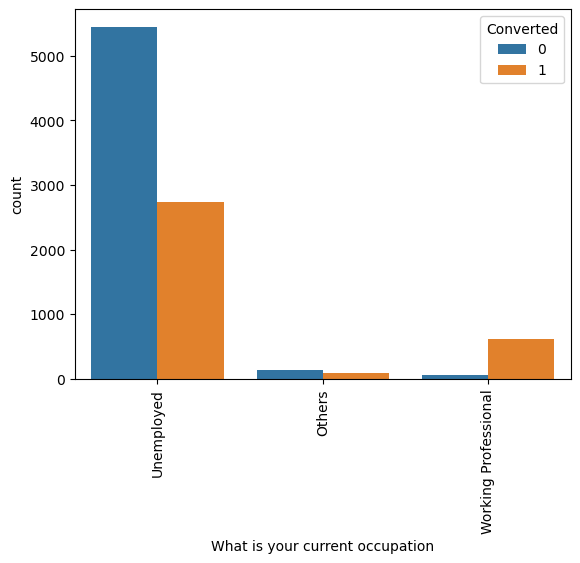

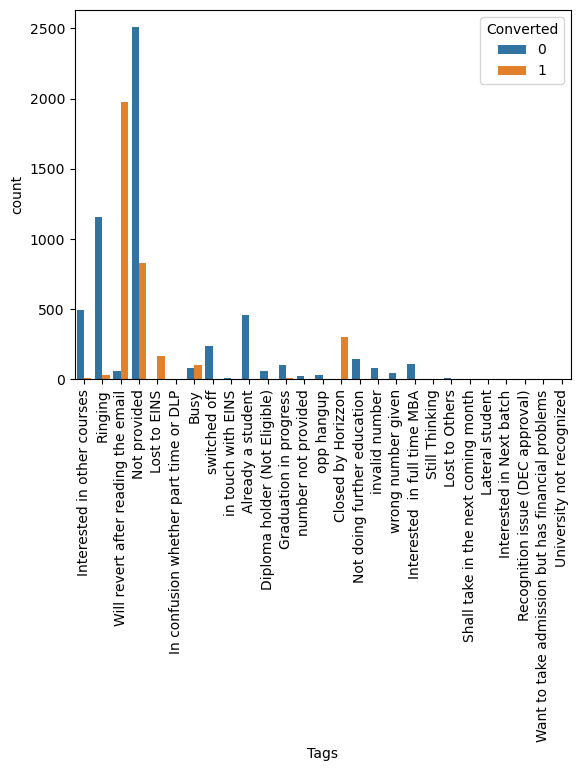

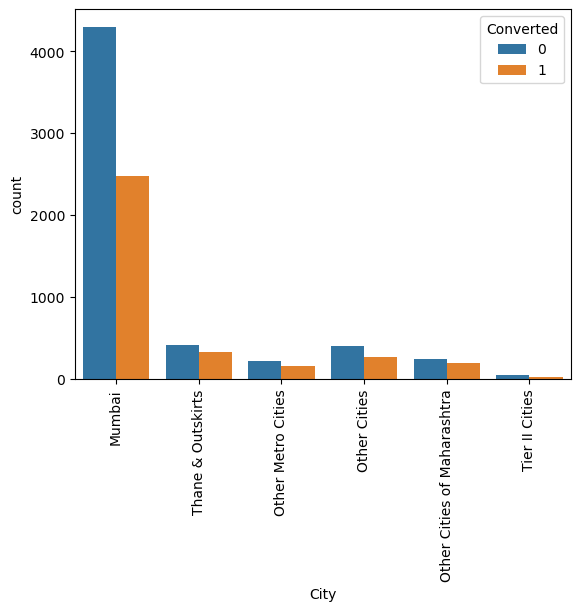

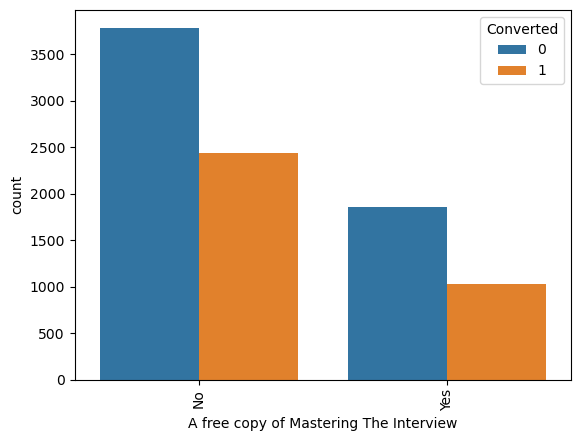

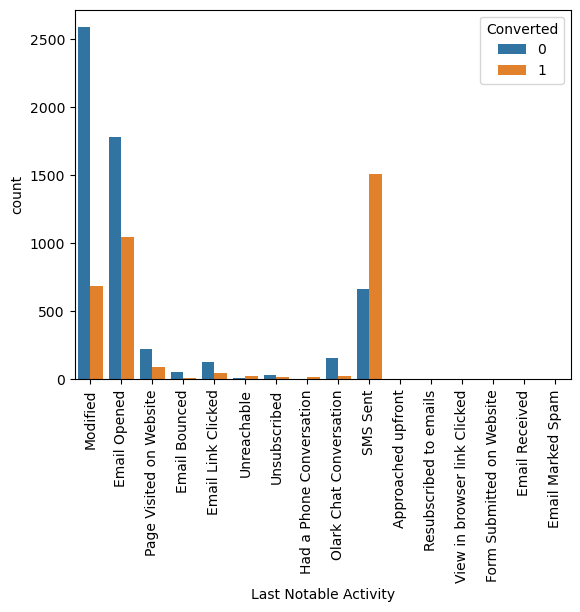

In [244]:
#plot df_col list against 'converted' column to see the trend
for a in df_col:
    s1=sns.countplot(x=df[a], hue=df.Converted)
    s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    plt.show()

* landing page Submission in Lead origin has highest count of converted as well as not converted cases
* Lead Source - Google and Direct traffic have highest converted cases
* Lead have mostly voted for not to email
* Total vists- as the number of visits to website increase the chances of conversion decrease. First timers convert faster
* LAst Activity- SMS sent and email opened means the conversion chances will increase.
* Specialization- Management Specializations have high conversion ratio
* Current occupation- percentage conversion of working professional is higher, however maximum leads who convert are unemployed.
* LEads who revert back after reading an email will definitely convert
* Maximum conversions come from city mumbai
* customer wants a free copy of 'Mastering the Interview' or not - The leads who opt no have high converiosn
* LAst activity- SMS and email as communication Source have high converison ratio. 


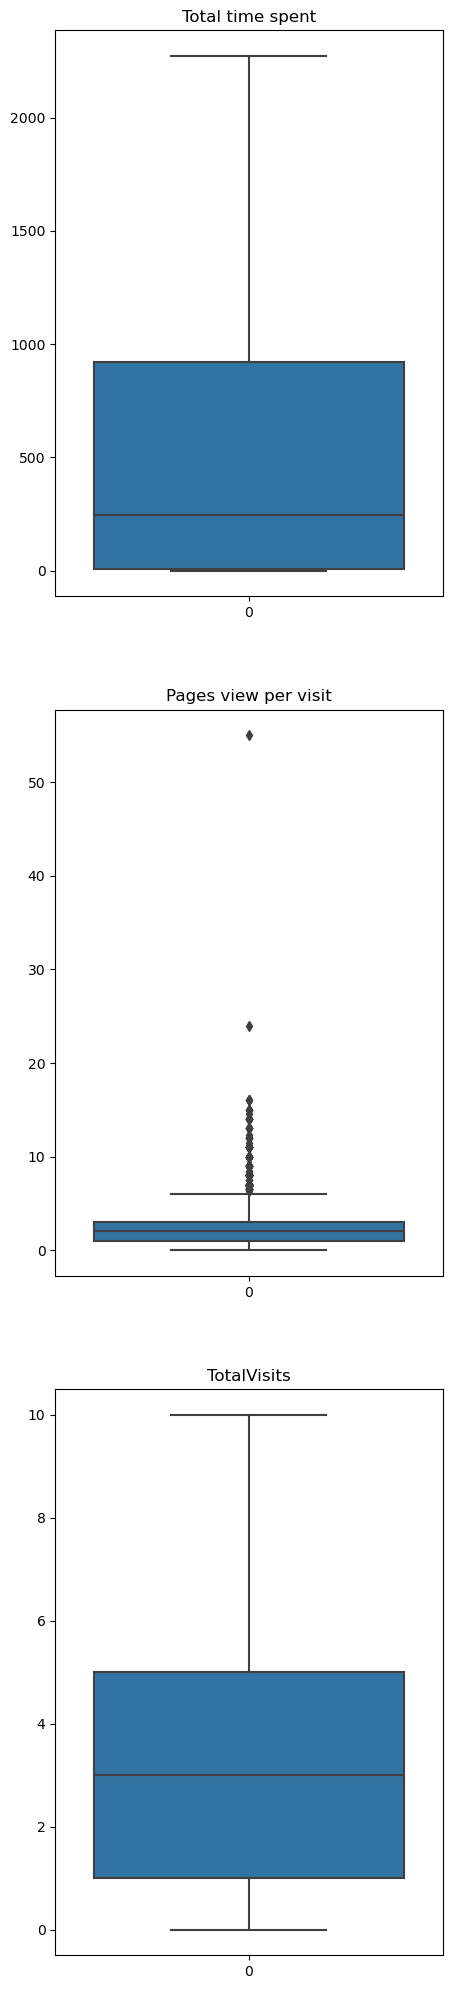

In [245]:
# we use boxplot to check for outliers
plt.figure(figsize = (5, 25))

plt.subplot(3,1,1)
sns.boxplot(df['Total Time Spent on Website'])
plt.title('Total time spent')

plt.subplot(3,1,2)
sns.boxplot(df['Page Views Per Visit'])
plt.title('Pages view per visit')

plt.subplot(3,1,3)
sns.boxplot(df['TotalVisits'])
plt.title('TotalVisits')

plt.show()

* Total time spent on website is between 0 to 900
* Number of pages viewed per visit is between 0 to 4 pages. Also Outliers are present in the Pages visit per visit. SO we will remove 2%

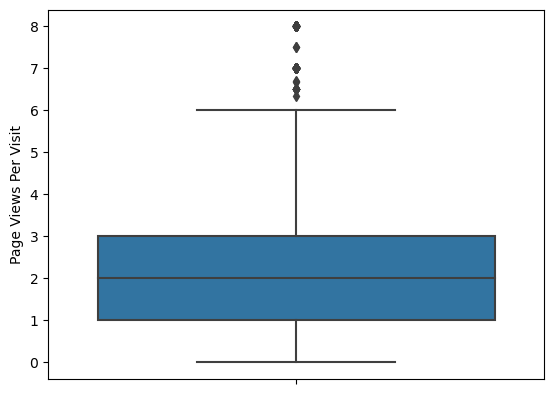

In [246]:
#Outlier treatment: Remove top & bottom 2% of the Column Outlier values in Pages viewed per visit

Q3 = df['Page Views Per Visit'].quantile(0.98)
df = df[(df['Page Views Per Visit'] <= Q3)]
Q1 = df['Page Views Per Visit'].quantile(0.02)
df = df[(df['Page Views Per Visit'] >= Q1)]
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

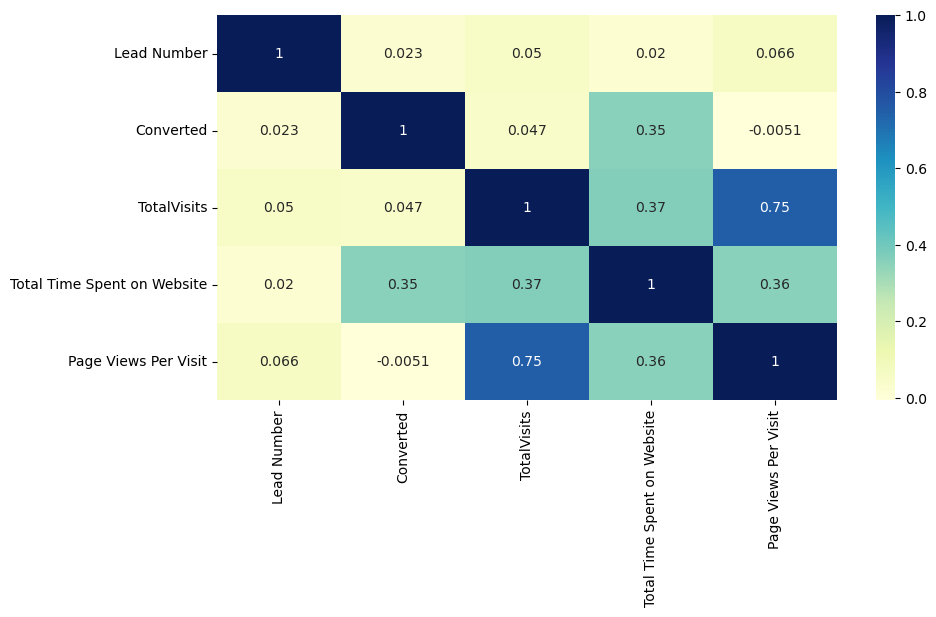

In [247]:
# Next we check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot = True, cmap="YlGnBu")
plt.show()

* The highest correlation is between Total time spent on website vs Pages viewed per visit

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8980 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             8980 non-null   int64  
 1   Lead Origin                             8980 non-null   object 
 2   Lead Source                             8980 non-null   object 
 3   Do Not Email                            8980 non-null   object 
 4   Converted                               8980 non-null   int64  
 5   TotalVisits                             8980 non-null   float64
 6   Total Time Spent on Website             8980 non-null   int64  
 7   Page Views Per Visit                    8980 non-null   float64
 8   Last Activity                           8980 non-null   object 
 9   Specialization                          8980 non-null   object 
 10  What is your current occupation         8980 non-null   obje

#### Create Dummy Variables

In [249]:
#getting a list of categorical columns

df_cols_obj= df.select_dtypes(include=['object']).columns
df_cols_obj

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [250]:
#getting a list of continuous columns

df_cols_intfloat= df.select_dtypes(include=['int64','float64']).columns
df_cols_intfloat

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

In [251]:
# Create dummy variables for categorical columns
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df_dummy = pd.concat([df, dummy], axis=1)
df_dummy

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Industry Specializations,Specialization_Management Specializations,Specialization_Not provided,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Not provided,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,API,Olark Chat,No,0,0.00,0,0.00,Page Visited on Website,Not provided,Unemployed,Interested in other courses,Mumbai,No,Modified,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,API,Organic Search,No,0,5.00,674,2.50,Email Opened,Not provided,Unemployed,Ringing,Mumbai,No,Email Opened,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,No,1,2.00,1532,2.00,Email Opened,Business Specializations,Others,Will revert after reading the email,Mumbai,Yes,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,No,0,1.00,305,1.00,Unreachable,Industry Specializations,Unemployed,Ringing,Mumbai,No,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,Landing Page Submission

In [252]:
# after creating dummy variables we drop the original columns
df_dummy = df_dummy.drop(['Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'], 1)
df_dummy

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Industry Specializations,Specialization_Management Specializations,Specialization_Not provided,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Not provided,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0.00,0,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,5.00,674,2.50,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.00,1532,2.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,1.00,305,1.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,1,2.00,1428,1.00,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,1,8.00,1845,2.67,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0

#### import all the libraries and divide data in Train and test = 70% for training and 30% for testing

In [253]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler


In [254]:
y = df_dummy['Converted']

In [255]:
X = df_dummy.drop(['Converted'], 1)
X.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Industry Specializations,Specialization_Management Specializations,Specialization_Not provided,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Not provided,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0.00,0,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,5.00,674,2.50,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,2.00,1532,2.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,1.00,305,1.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,2.00,1428,1.00,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [256]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [257]:
# scaling is used for numeric columns to normalize the data within a particular range
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()


,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Industry Specializations,Specialization_Management Specializations,Specialization_Not provided,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Not provided,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7963,588783,1.00,0.81,0.31,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
647,653849,0.30,0.14,0.38,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6264,601780,0.10,0.47,0.12,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2398,636687,0.50,0.00,0.31,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
224,658107,0.00,0.00,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [258]:
lr = LogisticRegression()

In [259]:
# Running RFE with 15 variables as output
rfe = RFE(lr)
rfe = rfe.fit(X_train, y_train)

In [260]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('TotalVisits', False, 7),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 20),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Others', False, 11),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 13),
 ('Lead Source_Social Media', False, 19),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Marked Spam', False, 29),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Email Received', False, 28),
 ('Last Activity_Form Submitted on Website', True, 1),
 ('Last Activity_Had a Phone Conversation', False, 9),

In [261]:
# Columns selected by RFE are stored in the variable 'col'
col = X_train.columns[rfe.support_]
col=col.drop(['Lead Number']) # because lead number is the identity of the leads and will not help in model building

In [262]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6286
Model:                            GLM   Df Residuals:                     6244
Model Family:                Binomial   Df Model:                           41
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1235.8
Date:                Mon, 18 Sep 2023   Deviance:                       2471.6
Time:                        09:01:29   Pearson chi2:                 1.01e+04
No. Iterations:                    25   Pseudo R-squ. (CS):             0.6070
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7018      0.716     -3.771      0.000      -4.106      -1.297
Total Time Spent on Website                              3.8653      0.250     15.479      0.000       3.376       4.355
Page Views Per Visit                                    -0.2807      0.363     -0.773      0.439      -0.992       0.431
Lead Origin_Landing Page Submission                     -0.4780      0.225     -2.121      0.034      -0.920      -0.036
Lead Origin_Lead Add Form                                2.7591      0.888      3.105      0.002       1.018       4.501
Lead Source_Google                                       0.1991      0.176      1.130      0.258      -0.146       0.544
Lead Source_Olark Chat                                   0.9236      0.233      3.956      0.000       0.466       1.381
Lead Source_Organic Search                               0.2317      0.204      1.137      0.256      -0.168       0.631
Lead Source_Reference                                   -1.3326      0.975     -1.367      0.172      -3.243       0.578
Lead Source_Welingak Website                             3.0775      1.345      2.288      0.022       0.441       5.714
Do Not Email_Yes                                        -0.8700      0.294     -2.957      0.003      -1.447      -0.293
Last Activity_Converted to Lead                         -1.5858      0.612     -2.593      0.010      -2.785      -0.387
Last Activity_Email Bounced                             -1.2716      0.697     -1.825      0.068      -2.637       0.094
Last Activity_Email Link Clicked                        -0.8310      0.540     -1.538      0.124      -1.890       0.228
Last Activity_Email Opened                              -1.0937      0.581     -1.883      0.060      -2.232       0.045
Last Activity_Form Submitted on Website                 -1.0748      0.730     -1.472      0.141      -2.506       0.356
Last Activity_Olark Chat Conversation                   -1.7597      0.581     -3.030      0.002      -2.898      -0.621
Last Activity_Page Visited on Website                   -1.4946      0.642     -2.328      0.020      -2.753      -0.236
Last Activity_SMS Sent                                   0.0771      0.549      0.141      0.888      -0.999       1.153
Specialization_Management Specializations               -0.1464      0.161     -0.911      0.362      -0.461       0.169
Specialization_Not provided                             -0.2237      0.253     -0.883      0.377      -0.720       0.273
What is your current occupation_Unemployed               0.3376      0.406      0.832      0.406      -0.458       1.133
What is your current occupation_Working Professional     0

In [263]:
# we will drop columns that have p value greater than 0.6
col = col.drop(['Tags_Diploma holder (Not Eligible)','Tags_Not doing further education',
                       'Last Notable Activity_Olark Chat Conversation','Tags_Graduation in progress'
                       ,'Tags_Closed by Horizzon','Last Activity_SMS Sent'])

In [264]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6286
Model:                            GLM   Df Residuals:                     6250
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1455.0
Date:                Mon, 18 Sep 2023   Deviance:                       2909.9
Time:                        09:01:34   Pearson chi2:                 1.55e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5786
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1474      0.532     -4.038      0.000      -3.190      -1.105
Total Time Spent on Website                              3.9336      0.228     17.277      0.000       3.487       4.380
Page Views Per Visit                                    -0.2357      0.326     -0.722      0.470      -0.875       0.404
Lead Origin_Landing Page Submission                     -0.5059      0.198     -2.554      0.011      -0.894      -0.118
Lead Origin_Lead Add Form                                2.6415      0.800      3.301      0.001       1.073       4.210
Lead Source_Google                                       0.3920      0.158      2.486      0.013       0.083       0.701
Lead Source_Olark Chat                                   1.1030      0.213      5.170      0.000       0.685       1.521
Lead Source_Organic Search                               0.4611      0.183      2.523      0.012       0.103       0.819
Lead Source_Reference                                    1.2431      0.838      1.484      0.138      -0.399       2.885
Lead Source_Welingak Website                             3.8003      1.286      2.955      0.003       1.279       6.321
Do Not Email_Yes                                        -1.1399      0.279     -4.085      0.000      -1.687      -0.593
Last Activity_Converted to Lead                         -1.8090      0.352     -5.145      0.000      -2.498      -1.120
Last Activity_Email Bounced                             -1.0672      0.500     -2.136      0.033      -2.046      -0.088
Last Activity_Email Link Clicked                        -0.6117      0.347     -1.762      0.078      -1.292       0.069
Last Activity_Email Opened                              -0.1375      0.230     -0.597      0.550      -0.589       0.314
Last Activity_Form Submitted on Website                 -1.2939      0.476     -2.719      0.007      -2.227      -0.361
Last Activity_Olark Chat Conversation                   -1.7309      0.264     -6.557      0.000      -2.248      -1.214
Last Activity_Page Visited on Website                   -1.1408      0.336     -3.397      0.001      -1.799      -0.483
Specialization_Management Specializations               -0.1399      0.143     -0.979      0.327      -0.420       0.140
Specialization_Not provided                             -0.3802      0.224     -1.699      0.089      -0.819       0.058
What is your current occupation_Unemployed               0.6304      0.328      1.920      0.055      -0.013       1.274
What is your current occupation_Working Professional     2.4108      0.436      5.529      0.000       1.556       3.265
Tags_Interested  in full time MBA                       -2

In [265]:
# we will drop columns that have p value greater than 0.2
col = col.drop(['Page Views Per Visit','Last Activity_Email Opened','Specialization_Management Specializations',
                'City_Thane & Outskirts','A free copy of Mastering The Interview_Yes'
               ,'Last Notable Activity_Email Opened','Last Notable Activity_Modified'])

In [266]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6286
Model:                            GLM   Df Residuals:                     6257
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1456.6
Date:                Mon, 18 Sep 2023   Deviance:                       2913.2
Time:                        09:01:35   Pearson chi2:                 1.58e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5784
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7004      0.392     -6.896      0.000      -3.468      -1.933
Total Time Spent on Website                              3.9202      0.227     17.278      0.000       3.476       4.365
Lead Origin_Landing Page Submission                     -0.5180      0.196     -2.644      0.008      -0.902      -0.134
Lead Origin_Lead Add Form                                2.6837      0.794      3.382      0.001       1.128       4.239
Lead Source_Google                                       0.4146      0.135      3.064      0.002       0.149       0.680
Lead Source_Olark Chat                                   1.1657      0.195      5.987      0.000       0.784       1.547
Lead Source_Organic Search                               0.4447      0.173      2.570      0.010       0.106       0.784
Lead Source_Reference                                    1.2649      0.837      1.511      0.131      -0.375       2.905
Lead Source_Welingak Website                             3.8677      1.287      3.006      0.003       1.346       6.389
Do Not Email_Yes                                        -1.0841      0.276     -3.932      0.000      -1.624      -0.544
Last Activity_Converted to Lead                         -1.7468      0.319     -5.469      0.000      -2.373      -1.121
Last Activity_Email Bounced                             -0.9842      0.484     -2.035      0.042      -1.932      -0.036
Last Activity_Email Link Clicked                        -0.3781      0.263     -1.439      0.150      -0.893       0.137
Last Activity_Form Submitted on Website                 -1.2762      0.454     -2.811      0.005      -2.166      -0.386
Last Activity_Olark Chat Conversation                   -1.6152      0.209     -7.747      0.000      -2.024      -1.207
Last Activity_Page Visited on Website                   -1.1208      0.303     -3.704      0.000      -1.714      -0.528
Specialization_Not provided                             -0.2186      0.183     -1.192      0.233      -0.578       0.141
What is your current occupation_Unemployed               0.6307      0.327      1.927      0.054      -0.011       1.272
What is your current occupation_Working Professional     2.4168      0.435      5.553      0.000       1.564       3.270
Tags_Interested  in full time MBA                       -2.5719      0.753     -3.417      0.001      -4.047      -1.097
Tags_Interested in other courses                        -2.3128      0.360     -6.423      0.000      -3.019      -1.607
Tags_Lost to EINS                                        5.2176      0.625      8.344      0.000       3.992       6.443
Tags_Not provided                                       -0

In [267]:
# we will drop columns that have p value greater than 0.1
col = col.drop(['Lead Source_Reference','Last Activity_Email Link Clicked','Specialization_Not provided'])

In [268]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6286
Model:                            GLM   Df Residuals:                     6260
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1459.5
Date:                Mon, 18 Sep 2023   Deviance:                       2918.9
Time:                        09:01:35   Pearson chi2:                 1.49e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5780
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.8873      0.359     -8.043      0.000      -3.591      -2.184
Total Time Spent on Website                              3.9425      0.226     17.434      0.000       3.499       4.386
Lead Origin_Landing Page Submission                     -0.3484      0.133     -2.616      0.009      -0.609      -0.087
Lead Origin_Lead Add Form                                3.8747      0.326     11.878      0.000       3.235       4.514
Lead Source_Google                                       0.4126      0.135      3.046      0.002       0.147       0.678
Lead Source_Olark Chat                                   1.1453      0.194      5.894      0.000       0.764       1.526
Lead Source_Organic Search                               0.4438      0.173      2.562      0.010       0.104       0.783
Lead Source_Welingak Website                             2.6556      1.062      2.501      0.012       0.575       4.736
Do Not Email_Yes                                        -1.0924      0.277     -3.940      0.000      -1.636      -0.549
Last Activity_Converted to Lead                         -1.7415      0.318     -5.470      0.000      -2.366      -1.118
Last Activity_Email Bounced                             -0.9727      0.483     -2.013      0.044      -1.920      -0.026
Last Activity_Form Submitted on Website                 -1.1901      0.452     -2.633      0.008      -2.076      -0.304
Last Activity_Olark Chat Conversation                   -1.5911      0.206     -7.716      0.000      -1.995      -1.187
Last Activity_Page Visited on Website                   -1.1083      0.302     -3.670      0.000      -1.700      -0.516
What is your current occupation_Unemployed               0.6282      0.324      1.940      0.052      -0.007       1.263
What is your current occupation_Working Professional     2.4418      0.431      5.659      0.000       1.596       3.287
Tags_Interested  in full time MBA                       -2.5551      0.751     -3.400      0.001      -4.028      -1.082
Tags_Interested in other courses                        -2.3108      0.358     -6.461      0.000      -3.012      -1.610
Tags_Lost to EINS                                        5.2041      0.626      8.319      0.000       3.978       6.430
Tags_Not provided                                       -0.3825      0.123     -3.115      0.002      -0.623      -0.142
Tags_Ringing                                            -3.8237      0.260    -14.710      0.000      -4.333      -3.314
Tags_Will revert after reading the email                 3.9177      0.194     20.172      0.000       3.537       4.298
Tags_invalid number                                     -3

#### P values are within the assumed range of below 0.05
#### Next we check the Variance Inflation Factor to see if there is any correlation between the variables

In [269]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,What is your current occupation_Unemployed,13.01
1,Lead Origin_Landing Page Submission,3.65
18,Tags_Not provided,3.61
4,Lead Source_Olark Chat,2.94
20,Tags_Will revert after reading the email,2.83
0,Total Time Spent on Website,2.42
12,Last Activity_Page Visited on Website,2.27
14,What is your current occupation_Working Profes...,2.24
3,Lead Source_Google,2.21
23,Last Notable Activity_Page Visited on Website,2.09


In [270]:
# we will drop columns that have VIF value greater than 5
col = col.drop(['What is your current occupation_Unemployed'])

In [271]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,Tags_Not provided,2.63
1,Lead Origin_Landing Page Submission,2.62
19,Tags_Will revert after reading the email,2.53
0,Total Time Spent on Website,2.26
12,Last Activity_Page Visited on Website,2.25
4,Lead Source_Olark Chat,2.15
22,Last Notable Activity_Page Visited on Website,2.09
7,Do Not Email_Yes,1.91
3,Lead Source_Google,1.88
9,Last Activity_Email Bounced,1.84


#### VIF values are within the range (below 5) and all the p values are also below 0.05. Hence we can freeze the model here.

In [272]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.9982313 , 0.90586163, 0.05237333, 0.00367728, 0.18298941,
       0.04363122, 0.99653992, 0.0042787 , 0.04363122, 0.04363122])

In [273]:
# Compare dataframe of actual converted and predicted probability of conversion by the model
y_train_pred_final = pd.DataFrame({'Converted_Actual':y_train.values, 'Conversion_Probability':y_train_pred})
y_train_pred_final.head(10)

,Converted_Actual,Conversion_Probability
0,1,1.00
1,1,0.91
2,0,0.05
3,0,0.00
4,0,0.18
5,0,0.04
6,1,1.00
7,0,0.00
8,0,0.04
9,0,0.04


#### As per model the predictions match the actual conversion.

In [274]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head(20)

,Converted_Actual,Conversion_Probability,Predicted
0,1,1.00,1
1,1,0.91,1
2,0,0.05,0
3,0,0.00,0
4,0,0.18,0
5,0,0.04,0
6,1,1.00,1
7,0,0.00,0
8,0,0.04,0
9,0,0.04,0


Next after model building we will proceed with model evaluation
#### Model Evaluation

In [275]:
# Creating confusion matrix for further evaluation of model
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted_Actual, y_train_pred_final.Predicted )
confusion

array([[3719,  185],
       [ 364, 2018]], dtype=int64)

In [276]:
# Calculate the accuracy % of the model
metrics.accuracy_score(y_train_pred_final.Converted_Actual, y_train_pred_final.Predicted)*100

91.2663060769965

##### The accuracy of the model is 91.26% 

In [277]:
# prepare data of confusion metric to calculate Sensitivity and Specificity
# True positive
TP = confusion[1,1]
# True negatives
TN = confusion[0,0]
# False positives
FP = confusion[0,1] 
# False negatives
FN = confusion[1,0]

In [278]:
# Specificity
TN/(TN+FP)

0.9526127049180327

In [279]:
# Sensitivity
TP/(TP+FN)

0.8471872376154492

In [280]:
# false positive rate
FP/(TN+FP)

0.047387295081967214

In [281]:
# positive predictive rate
TP/(TP+FP)

0.9160236041761235

In [282]:
# Negative predictive rate
TN/(TN+ FN)

0.9108498652951261

#### For the model above with cutoff probability for conversion at 0.5 , we have achieved a model acccuracy of 91.26%, Specificity of 0.9526 and Sensitivity of 0.8472. 
#### False positive rate is low = 0.047
#### the predictive rate of model for positive and negative is 0.91

#### Plot the ROC curve
The Previous cut off was randomly selected, by ROC we will find the optimal value of cut off 

In [283]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [285]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted_Actual, y_train_pred_final.Conversion_Probability, 
                                         drop_intermediate = False)

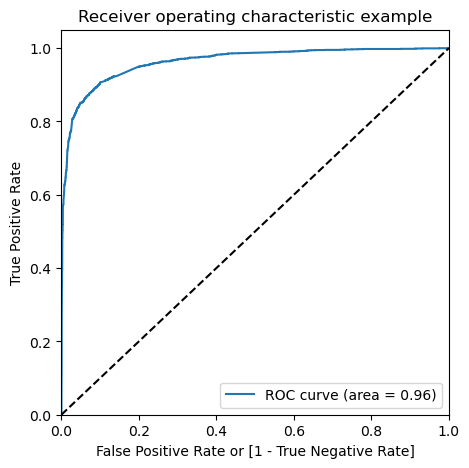

In [286]:
draw_roc(y_train_pred_final.Converted_Actual, y_train_pred_final.Conversion_Probability)

#### Area under the curve is 0.96

In [287]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted_Actual,Conversion_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,1.00,1,1,1,1,1,1,1,1,1,1,1
1,1,0.91,1,1,1,1,1,1,1,1,1,1,1
2,0,0.05,0,1,0,0,0,0,0,0,0,0,0
3,0,0.00,0,1,0,0,0,0,0,0,0,0,0
4,0,0.18,0,1,1,0,0,0,0,0,0,0,0


In [288]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted_Actual, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.00,0.00,0.38,1.00,0.00
0.10,0.10,0.80,0.97,0.69
0.20,0.20,0.89,0.92,0.87
0.30,0.30,0.90,0.89,0.91
0.40,0.40,0.91,0.87,0.93
0.50,0.50,0.91,0.85,0.95
0.60,0.60,0.91,0.82,0.97
0.70,0.70,0.90,0.77,0.98
0.80,0.80,0.89,0.73,0.98
0.90,0.90,0.86,0.65,0.99


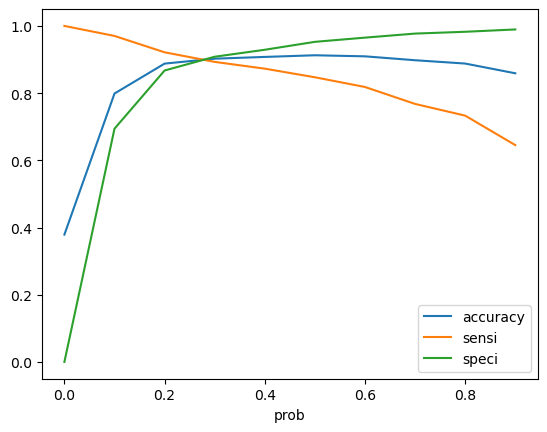

In [289]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From above graph the optimal cutoff appears to be 0.32

In [311]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Probability.map( lambda x: 1 if x > 0.32 else 0)
y_train_pred_final.head()

,Converted_Actual,Conversion_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,1.00,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.91,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.05,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.00,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.18,0,1,1,0,0,0,0,0,0,0,0,0


In [312]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted_Actual, y_train_pred_final.final_predicted)

0.9050270442252625